In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fol_dir = "/content/drive/MyDrive/mah_ws/ai_prj/3D_Tumor/private/stat/statistics"
list_file = [item for item in os.listdir(fol_dir) if (".xlsx" in item)]
list_file


['df_data.xlsx',
 'FLAIR_image_stat.xlsx',
 'T1w_image_stat.xlsx',
 't1gd_image_stat.xlsx',
 'T2w_image_stat.xlsx',
 'FLAIR_label_stat.xlsx',
 'T1w_label_stat.xlsx',
 't1gd_label_stat.xlsx',
 'T2w_label_stat.xlsx']

In [5]:
for val in list_file:
  name = val.split(".xlsx")[0]
  globals()[f"{name}"] = pd.read_excel(f"{fol_dir}/{val}")

In [14]:
FLAIR_image_stat.head().T

,0,1,2,3,4
image,./imagesTr/BRATS_457.nii.gz,./imagesTr/BRATS_306.nii.gz,./imagesTr/BRATS_206.nii.gz,./imagesTr/BRATS_449.nii.gz,./imagesTr/BRATS_318.nii.gz
label,./labelsTr/BRATS_457.nii.gz,./labelsTr/BRATS_306.nii.gz,./labelsTr/BRATS_206.nii.gz,./labelsTr/BRATS_449.nii.gz,./labelsTr/BRATS_318.nii.gz
phase,train,train,train,train,train
Shape,"(155, 240, 240)","(155, 240, 240)","(155, 240, 240)","(155, 240, 240)","(155, 240, 240)"
Width,240,240,240,240,240
Height,240,240,240,240,240
Depth,155,155,155,155,155
Origin,"(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)"
OriginX,0,0,0,0,0
OriginY,0,0,0,0,0


## EDA: Sample Image FLAIR

In [6]:
FLAIR_label_stat.head().T

,0,1,2,3,4
image,./imagesTr/BRATS_457.nii.gz,./imagesTr/BRATS_306.nii.gz,./imagesTr/BRATS_206.nii.gz,./imagesTr/BRATS_449.nii.gz,./imagesTr/BRATS_318.nii.gz
label,./labelsTr/BRATS_457.nii.gz,./labelsTr/BRATS_306.nii.gz,./labelsTr/BRATS_206.nii.gz,./labelsTr/BRATS_449.nii.gz,./labelsTr/BRATS_318.nii.gz
phase,train,train,train,train,train
nlabel,3,3,3,3,3
nprop,38,38,38,38,38
...,...,...,...,...,...
weighted_principal_moments_3,"(10.118031986758295, 24.367475929663886, 60.52...","(24.02503171241275, 37.48231597635626, 59.1302...","(61.9971029868821, 90.15030094234989, 326.2173...","(128.46761618594343, 143.33859837425058, 183.1...","(55.12809715255378, 83.80037744057799, 423.873..."
bbox_3,"(67, 130, 39, 28, 25, 26)","(59, 101, 56, 28, 34, 26)","(120, 90, 41, 65, 72, 55)","(117, 126, 60, 52, 64, 51)","(57, 46, 37, 50, 65, 80)"
region_3,"(67, 130, 39, 28, 25, 26)","(59, 101, 56, 28, 34, 26)","(120, 90, 41, 65, 72, 55)","(117, 126, 60, 52, 64, 51)","(57, 46, 37, 50, 65, 80)"
min_index_3,"(87, 147, 61)","(63, 119, 59)","(140, 139, 61)","(161, 152, 69)","(97, 51, 98)"


In [7]:
print(f"Dataframe shape {FLAIR_label_stat.shape}")

Dataframe shape (484, 119)


In [47]:
npixel = t1gd_label_stat[["npixels_1","npixels_2","npixels_3"]]
npixel.rename({'npixels_1': 'Oedenma', 'npixels_2': 'Non_Enhancing', "npixels_3":"Enhancing"}, axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [48]:
import numpy as np
npixel["Background"] =  8928000 - sum((npixel["Oedenma"],npixel["Non_Enhancing"],npixel["Enhancing"]))

<ipython-input-48-865a062a3491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npixel["Background"] =  8928000 - sum((npixel["Oedenma"],npixel["Non_Enhancing"],npixel["Enhancing"]))


In [50]:
npixel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Oedenma        484 non-null    int64  
 1   Non_Enhancing  484 non-null    int64  
 2   Enhancing      472 non-null    float64
 3   Background     472 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.2 KB


In [44]:
npixel.to_csv(f"{fol_dir}/stats_npixel.csv")

## Split features following type

In [ ]:
intfeature = FLAIR_label_stat.select_dtypes(include='int64')
floatfeature = FLAIR_label_stat.select_dtypes(include='float64')
objectfeature = FLAIR_label_stat.select_dtypes(include='object')

### Check features have type int

In [ ]:
weight_col = [col for col in FLAIR_label_stat.columns if 'weight' in col]
weight_col

['weighted_flatness_1',
 'weighted_elongation_1',
 'weighted_principal_axes_1',
 'weighted_principal_moments_1',
 'weighted_flatness_2',
 'weighted_elongation_2',
 'weighted_principal_axes_2',
 'weighted_principal_moments_2',
 'weighted_flatness_3',
 'weighted_elongation_3',
 'weighted_principal_axes_3',
 'weighted_principal_moments_3']

```
Tumor mask dont have border
--> Remove that features
```

In [ ]:
borderfeature = [name for name in intfeature.columns if ('border' in name) or ('feret_diameter' in name)]
borderfeature.append("nlabel")
borderfeature.append("nprop") 

In [ ]:
intfeature = intfeature.drop(labels=borderfeature, axis=1)

In [ ]:
intfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sizex_1          484 non-null    int64
 1   sizey_1          484 non-null    int64
 2   sizez_1          484 non-null    int64
 3   bbox_size_1      484 non-null    int64
 4   npixels_1        484 non-null    int64
 5   physical_size_1  484 non-null    int64
 6   min_1            484 non-null    int64
 7   max_1            484 non-null    int64
 8   sum_1            484 non-null    int64
 9   sizex_2          484 non-null    int64
 10  sizey_2          484 non-null    int64
 11  sizez_2          484 non-null    int64
 12  bbox_size_2      484 non-null    int64
 13  npixels_2        484 non-null    int64
 14  physical_size_2  484 non-null    int64
 15  min_2            484 non-null    int64
 16  max_2            484 non-null    int64
 17  sum_2            484 non-null    int64
dtypes: int64(1

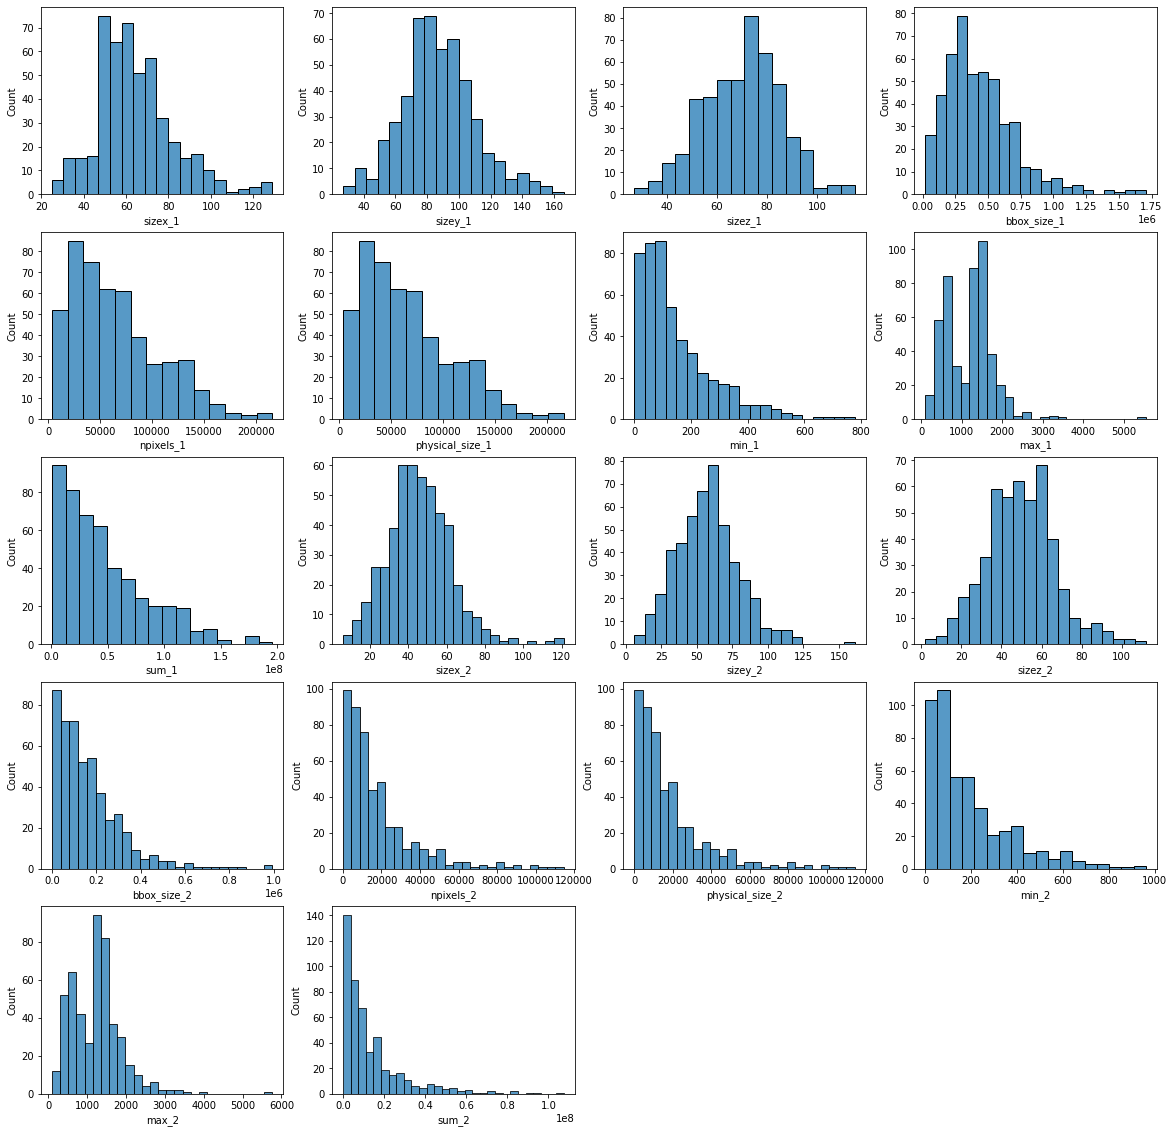

In [ ]:
plt.figure(figsize=(20,20))
for idx, name in enumerate(intfeature.columns):
  plt.subplot(5,4,idx+1)
  sns.histplot(intfeature[name])

## Check float feature

In [ ]:
floatfeature.describe().T

,count,mean,std,min,25%,50%,75%,max
perimeter_1,484.0,2.406428e+04,1.177490e+04,3497.964763,1.556240e+04,2.187716e+04,3.190208e+04,7.832607e+04
median_1,484.0,7.099160e+02,3.002333e+02,52.472656,4.123408e+02,8.576172e+02,9.504023e+02,1.222746e+03
mean_1,484.0,7.152342e+02,3.031576e+02,54.595313,4.163399e+02,8.643701e+02,9.565484e+02,1.222020e+03
std_1,484.0,1.275574e+02,6.939696e+01,13.874803,7.018753e+01,1.222009e+02,1.703636e+02,3.665035e+02
var_1,484.0,2.107688e+04,2.159762e+04,192.510145,4.926293e+03,1.493319e+04,2.902382e+04,1.343248e+05
kurtosis_1,484.0,4.488954e-01,1.659099e+00,-1.288286,-5.887804e-01,5.500458e-02,9.564589e-01,1.339113e+01
skew_1,484.0,1.188421e-03,5.649232e-01,-2.490875,-3.548601e-01,1.747951e-02,3.606063e-01,1.815780e+00
flatness_1,484.0,1.391038e+00,2.947801e-01,1.022706,1.197681e+00,1.323576e+00,1.477530e+00,2.943580e+00
roundness_1,484.0,3.233344e-01,7.942979e-02,0.150486,2.615249e-01,3.201692e-01,3.747706e-01,6.199428e-01
weighted_flatness_1,484.0,1.399186e+00,2.989578e-01,1.019768,1.208555e+00,1.335048e+00,1.484775e+00,3.044159e+00


In [ ]:
zerofeature = [name for name in floatfeature.columns if ('border' in name) or ('feret_diameter' in name)]

In [ ]:
floatfeature = floatfeature.drop(labels=zerofeature, axis=1)

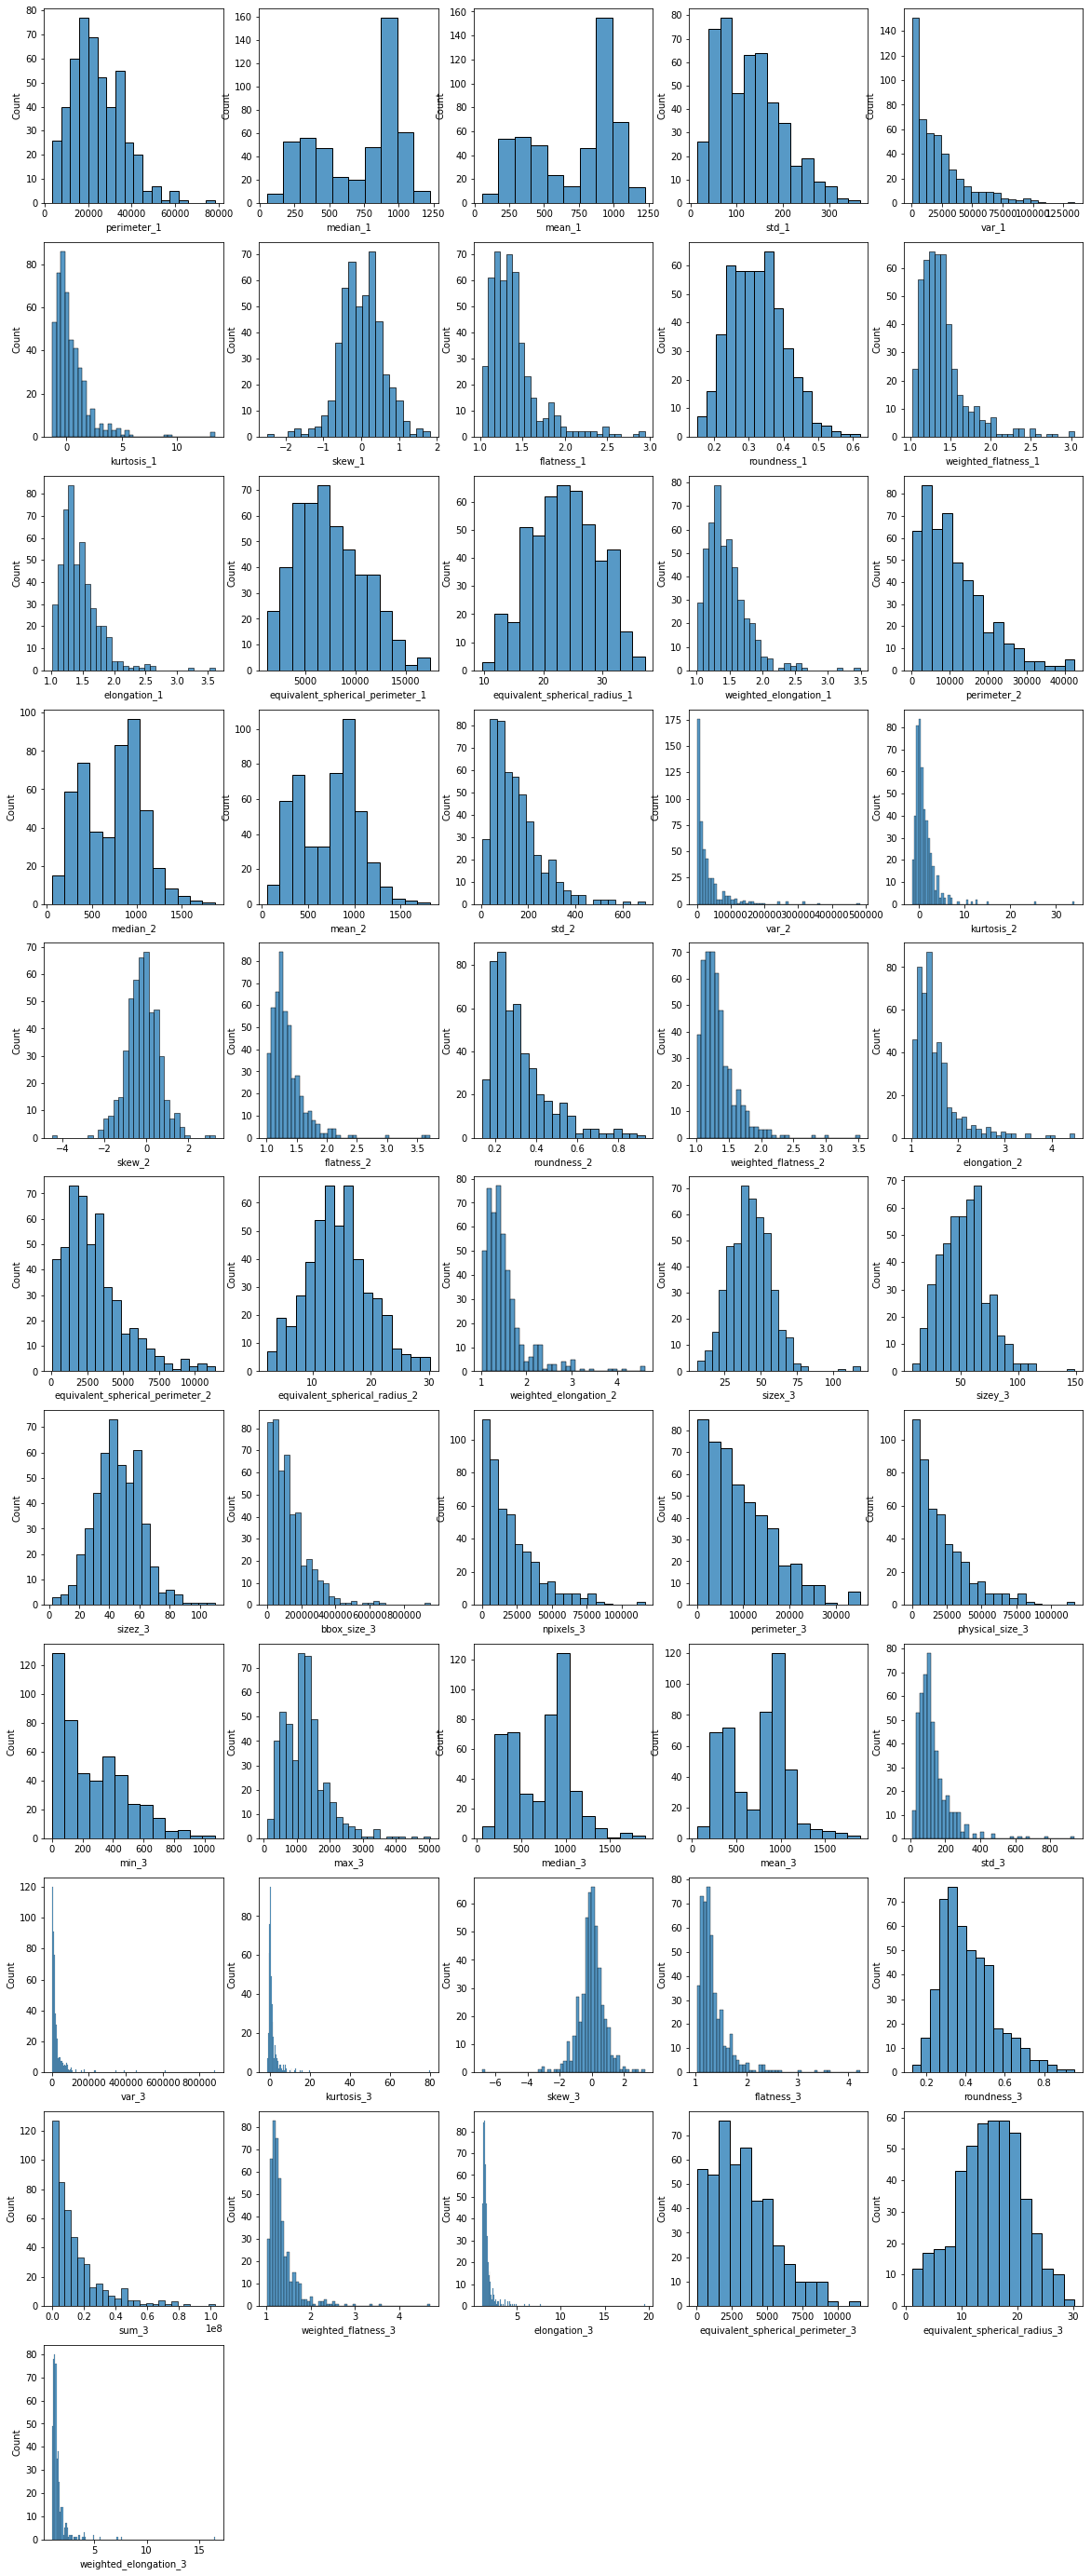

In [ ]:
plt.figure(figsize=(20,50))
for idx, name in enumerate(floatfeature.columns):
  plt.subplot(11,5,idx+1)
  sns.histplot(floatfeature[name])